In [3]:
from obspy.core.event import read_events
import obspy
import numpy as np
import pandas as pd
from scipy.special import sph_harm
import matplotlib.pyplot as plt
import os.path
import shutil
from obspy import UTCDateTime
from netCDF4 import Dataset
from matplotlib import cm
from skimage.filters import gaussian
from mpl_toolkits.basemap import Basemap
from itertools import chain

from scipy.stats import qmc

dpi = 300
FigFormat = "png"

def draw_map(map):

    # draw a shaded-relief image
    map.shadedrelief(scale=0.2)
    
    # lats and longs are returned as a dictionary
    lats = map.drawparallels(np.linspace(-90, 90, 13))
    lons = map.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

Text(0.5, 1.0, 'Latin Hypercube Sampling (n = 1000)')

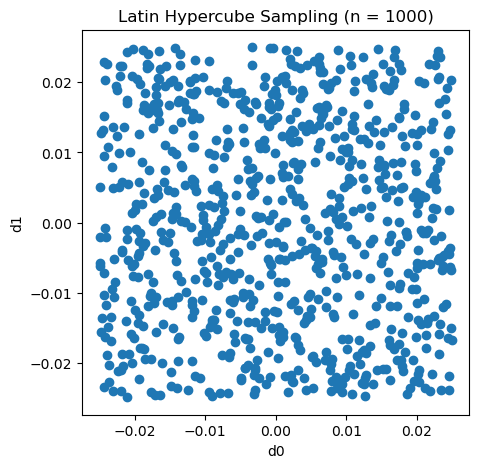

In [3]:
# Dim = 81*5
# N = 10000
# tomorange = 0.025
# sampler = qmc.LatinHypercube(d=Dim)
# sample = sampler.random(n=N)
# l_bounds = [-tomorange]*Dim
# u_bounds = [tomorange]*Dim
# sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
# np.save('samling_array_%d' %N,sample_scaled)

# plt.figure(figsize=(5, 5))
# plt.scatter(sample_scaled[0:819, 0], sample_scaled[0:819, 1])
# plt.xlabel("d0")
# plt.ylabel("d1")
# plt.title(f"Latin Hypercube Sampling (n = {1000})")

In [2]:
sample_scaled = np.load('samling_array_10000.npy')

In [ ]:
ExampleInputDir = '../Runs/ExampleSphericalHarmonicsAcousticBall/input'

for imodel in np.arange(0,10000):

    ModeName = 'LatinSphericalHarmonicsAcousticBall%04d' %imodel
    EventParDir='../Runs/%s' %(ModeName)  
    if not os.path.exists(EventParDir):
        os.makedirs(EventParDir)
    print(EventParDir, " created")

    if not os.path.exists(EventParDir+'/input'):
        os.makedirs(EventParDir+'/input')

    # copy parameter file
    # shutil.copy(ExampleInputDir+'/TomoNet_LowerMantle__10s.e',EventParDir+'/input/')

    # shutil.copy(ExampleInputDir+'/inparam.model.yaml',EventParDir+'/input/')

    # shutil.copy(ExampleInputDir+'/inparam.nr.yaml',EventParDir+'/input/')

    # shutil.copy(ExampleInputDir+'/inparam.advanced.yaml',EventParDir+'/input/')

    # shutil.copy(ExampleInputDir+'/inparam.source.yaml',EventParDir+'/input/')
    # # update event source
    # with open(EventParDir+'/input/inparam.source.yaml','r') as file:
    #     filetxt = file.read()
    # filetxt = filetxt.replace("latitude_longitude: [-56.24, 26.34]", "latitude_longitude: [%.2f, %.2f]" %(EventLat, EventLon))
    # filetxt = filetxt.replace("depth: 46.56e3", "depth: %.1f" %(EventDepth))
    # filetxt = filetxt.replace("data: [2.73e23, 9.08e21, -2.82e23, 6.30e22, 1.90e23, 2.16e23]", "data: [%e, %e, %e, %e, %e, %e]"  %(MomentTensor['m_rr'],MomentTensor['m_tt'],MomentTensor['m_pp'],MomentTensor['m_rt'],MomentTensor['m_rp'],MomentTensor['m_tp']))
    # with open(EventParDir+'/input/inparam.source.yaml','w') as file:
    #     file.write(filetxt)

    shutil.copy(ExampleInputDir+'/inparam.output.yaml',EventParDir+'/input/')

    # shutil.copy(ExampleInputDir+'/Synthetic_Stations_Ball.txt',EventParDir+'/input/')

    # # generate random model
    ### Real spherical harmonics
    # coeff = {}

    # ModelCoeff = dict()
    # ModelCoeff['Depth'] = []
    # ModelCoeff['l'] = []
    # ModelCoeff['m'] = []
    # ModelCoeff['Value'] = []

    # l_max = 8
    # DepthList = [0. , 200, 400, 600, 800]

    # para_index = 0

    # for depth in DepthList:
    #     coeff[depth] = {}
        
    #     for l in range(0,l_max+1):
    #         for m in np.arange(-l,l+1):
    #             name = '%s_%s' %(l, m)
    #             # print(l,m)
    #             ModelCoeff['Depth'].append(depth)
    #             ModelCoeff['l'].append(l)
    #             ModelCoeff['m'].append(m)

    #             Val = sample_scaled[imodel,para_index]  # Latin Hypercube Sampling
    #             ModelCoeff['Value'].append(Val)
    #             coeff[depth][name] = Val       

    #             para_index += 1

    # df = pd.DataFrame(data=ModelCoeff)
    # df.to_pickle(EventParDir+"/Spherical_Harmonics.pkl")

    # grid_depth = np.array(DepthList)
    # grid_lat = np.linspace(-90, 90, 181)
    # grid_lon = np.linspace(-180, 180, 361)

    # # Make sure RADISU and Coordinates are ascendingly sorted
    # grid_depth.sort()
    # grid_lat.sort()
    # grid_lon.sort()

    # LON, LAT = np.meshgrid(grid_lon, grid_lat)
    # MLTomo = np.zeros([len(grid_lat), len(grid_lon), len(grid_depth)])

    # for i, SlicingDepth in enumerate(DepthList):
    #     # initiate TomoSum
    #     TomoSum = np.zeros([len(grid_lat),len(grid_lon)])

    #     for l in range(0,l_max+1):
    #         for m in np.arange(-l,l+1):
    #             # print('l, m = ', l, m)
    #             name = '%s_%s' %(l, m)
    #             Y_grid = sph_harm(m, l, np.radians(LON-180), np.radians(90-LAT))

    #             if m < 0:
    #                 Y_grid = np.sqrt(2) * (-1)**(-m) * Y_grid.imag
    #             elif m > 0:
    #                 Y_grid = np.sqrt(2) * (-1)**m * Y_grid.real

    #             TomoSum[:,:] = TomoSum[:,:] + coeff[SlicingDepth][name] * Y_grid
    #     MLTomo[:,:,i] = TomoSum[:,:]
    
    # print(MLTomo.min(), MLTomo.max())

    # # # Fig Preparation
    # # dpi = 200
    # # fig = plt.figure(figsize=(3.5,3),dpi=200)
    # # ax = fig.add_subplot(111)

    # # map = Basemap(projection='moll',lon_0=0,resolution='l') # moll Projection
    # # PLOT = map.pcolormesh(LON, LAT, TomoSum, latlon=True, cmap=plt.get_cmap('jet'))
    # # cbar = plt.colorbar(PLOT, ax=ax, shrink=0.5)
    # # ax.set_title('Depth Slice at %s m to degrees %d' %(SlicingDepth, l_max))
    # # draw_map(map)
    # # map.drawcoastlines(linewidth=0.1)

    # NCName = "degree8_random.nc"
    # # write to file
    # if os.path.exists(EventParDir+'/input/'+NCName):
    #     os.remove(EventParDir+'/input/'+NCName)

    # nc = Dataset(EventParDir+'/input/'+NCName, 'w')
    # nc.createDimension('nlat', size=len(grid_lat))
    # nc.createDimension('nlon', size=len(grid_lon))
    # nc.createDimension('ndepth', size=len(grid_depth))
    # nc.createVariable('latitude', float, dimensions=('nlat'))
    # nc['latitude'][:] = grid_lat
    # nc.createVariable('longitude', float, dimensions=('nlon'))
    # nc['longitude'][:] = grid_lon
    # nc.createVariable('depth', float, dimensions=('ndepth'))
    # nc['depth'][:] = grid_depth
    # nc.createVariable('dvp', float, dimensions=('nlat', 'nlon','ndepth'))
    # nc['dvp'][:,:,:] = MLTomo[:,:,:]


    # if imodel == 0:
    #     nc['dvp'][:,:,:] = np.zeros(np.shape(MLTomo[:,:,:]))
    #     nc.close()
    #     continue

    # nc.close()



In [7]:
MLtomo_ptb_smooth.min(), MLtomo_ptb_smooth.max()

(-0.04590417695446651, 0.04053691999487109)

In [8]:
MLtomo_ptb.min(), MLtomo_ptb.max()

(-0.09998533711018423, 0.09996325148616125)

In [20]:
print(df)

     Depth  l  m     Value
0      0.0  0  0  0.017159
1      0.0  1 -1 -0.025314
2      0.0  1  0  0.016516
3      0.0  1  1 -0.031136
4      0.0  2 -2 -0.042858
..     ... .. ..       ...
400  800.0  8  4  0.023039
401  800.0  8  5  0.047308
402  800.0  8  6  0.001952
403  800.0  8  7  0.034860
404  800.0  8  8  0.000065

[405 rows x 4 columns]
